| [03_data_science/05_SciPy统计分布.ipynb](https://github.com/shibing624/python-tutorial/blob/master/03_data_science/05_SciPy统计分布.ipynb)  | Scipy统计分布  |[Open In Colab](https://colab.research.google.com/github/shibing624/python-tutorial/blob/master/03_data_science/05_SciPy统计分布.ipynb) |

# SciPy统计分布

## SciPy的简介

SciPy是建立在在Numpy基础上的科学计算库，提供大量的科学计算支持。

在科学计算中我们往往会用到如下4个常用而又强大的功能：

*    数值优化：scipy.optimize, 最优问题的数值近似解问题能够得到求解
*    数值积分：scipy.integrate, 能够从数值角度求解积分问题，可以当作解析解的验证手段；同时也能够像Matlab一样求解微分方程
*    插值算法：scipy.interpolate, 采样精度过低时可以使用interpolate得到连续曲线
*    信号处理：scipy.signal, scipy.fftpack 滤波器和时间序列模型在数学上有异曲同工之妙，此处用这些库实现信号处理功能

SciPy的其他重要内容会在其他内容中反复提及，比如

*    线性代数：scipy.linalg直接映射了np.linalg的功能，如矩阵特征值分解、SVD分解、QR分解等。
*    统计功能：scipy.stats具有强大的统计分布生成、探索、检查功能，在统计分布/随机数生成部分中结合理论介绍。
*    稀疏矩阵：scipy.sparse在NumPy基础和NetworkX部分有所提及，在网络图模型中占有一席之地。
*    科学函数：scipy.special, 能够快速给出一些科学函数的值（常见的如贝塞尔函数，排列组合数等）

### 子模块

|子模块|描述|
|:----|:----|
|cluster|聚类算法|
|constants|物理数学常数|
|fftpack|快速傅里叶变换|
|integrate|积分和常微分方程求解|
|interpolate|插值|
|io|输入输出|
|linalg|线性代数|
|odr|正交距离回归|
|optimize|优化和求根|
|signal|信号处理|
|sparse|稀疏矩阵|
|spatial|空间数据结构和算法|
|special|特殊方程|
|stats|统计分布和函数|
|weave|调用C/C++|



使用scipy之前，基础模块需要导入：

In [48]:
import numpy as np

In [50]:
# 径向基函数
x = np.linspace(-3, 3, 100)
x

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

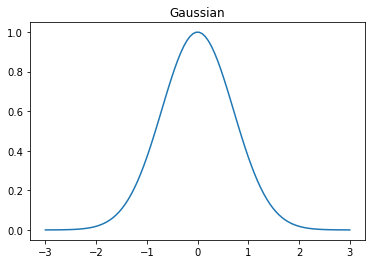

In [51]:
# 高斯函数
plt.plot(x, np.exp(-1 * x ** 2))
plt.title("Gaussian")

plt.show()

In [6]:
plt.savefig('Gaussian.png')

<Figure size 432x288 with 0 Axes>

In [7]:
import os
os.path.exists('Gaussian.png')

True

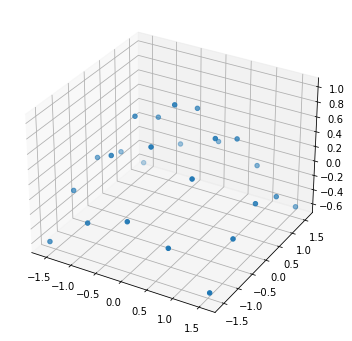

In [8]:
# 高维 RBF 插值
# 三维数据点：
x, y = np.mgrid[-np.pi / 2:np.pi / 2:5j, -np.pi / 2:np.pi / 2:5j]
z = np.cos(np.sqrt(x ** 2 + y ** 2))
fig = plt.figure(figsize=(12, 6))
ax = fig.gca(projection="3d")
ax.scatter(x, y, z)
fig.savefig("mplot3d.jpg")
plt.show()

In [9]:
os.remove('Gaussian.png')
os.remove('mplot3d.jpg')

## 统计模块：stats

Python 中常用的统计工具有 Numpy, Pandas, PyMC, StatsModels 等。
Scipy 中的子库 scipy.stats 中包含很多统计上的方法。


In [10]:
# Numpy 自带简单的统计方法：
heights = np.array([1.46, 1.79, 2.01, 1.75, 1.56, 1.69, 1.88, 1.76, 1.88, 1.78])
print('mean,', heights.mean())
print('min,', heights.min())
print('max', heights.max())
print('stand deviation,', heights.std())

mean, 1.7559999999999998
min, 1.46
max 2.01
stand deviation, 0.15081114017207078


导入 Scipy 的统计模块：

In [11]:
import scipy.stats.stats as st

print('mode, ', st.mode(heights))  # 众数及其出现次数
print('skewness, ', st.skew(heights))  # 偏度
print('kurtosis, ', st.kurtosis(heights))  # 峰度

mode,  ModeResult(mode=array([1.88]), count=array([2]))
skewness,  -0.3935244564726347
kurtosis,  -0.33067209772439865


### 概率分布
常见的连续概率分布有：
- 均匀分布
- 正态分布
- 学生t分布
- F分布
- Gamma分布
...
- 离散概率分布：
- 伯努利分布
- 几何分布
...

这些都可以在 scipy.stats 中找到。

它包含四类常用的函数：

- norm.cdf 返回对应的累计分布函数值
- norm.pdf 返回对应的概率密度函数值
- norm.rvs 产生指定参数的随机变量
- norm.fit 返回给定数据下，各参数的最大似然估计（MLE）值

 从正态分布产生500个随机点：


In [12]:
# 正态分布
from scipy.stats import norm
x_norm = norm.rvs(size=500)
x_norm.shape

(500,)

直方图：

counts,  [  7.  22.  44.  56.  75. 117.  76.  47.  40.  16.]
bin centers [-2.61331997 -2.11619356 -1.61906715 -1.12194073 -0.62481432 -0.1276879
  0.36943851  0.86656493  1.36369134  1.86081775  2.35794417]


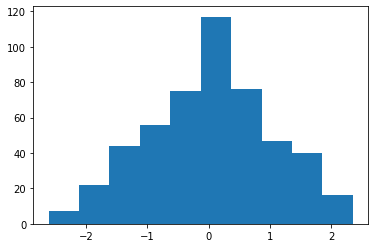

In [13]:
plt.ion() #开启interactive mode

h = plt.hist(x_norm)
print('counts, ', h[0])
print('bin centers', h[1])
figure = plt.figure(1)  # 创建图表1
plt.show()

归一化直方图（用出现频率代替次数），将划分区间变为 20（默认 10）：

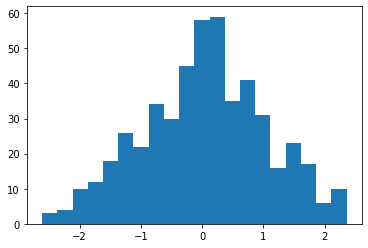

In [14]:
h = plt.hist(x_norm, bins=20)
plt.show()

在这组数据下，正态分布参数的最大似然估计值为：

In [15]:
x_mean, x_std = norm.fit(x_norm)

print('mean, ', x_mean)
print('x_std, ', x_std)

mean,  0.04107482632105179
x_std,  1.0107711572543323


将真实的概率密度函数与直方图进行比较：

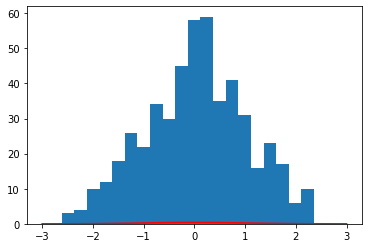

In [16]:
h = plt.hist(x_norm, bins=20)

x = np.linspace(-3, 3, 50)
p = plt.plot(x, norm.pdf(x), 'r-')
plt.show()

积分函数：

95.45% of the values lie between -2 and 2


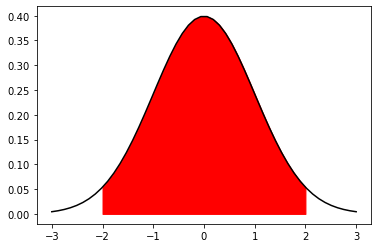

In [17]:
from scipy.integrate import trapz

x1 = np.linspace(-2, 2, 108)
p = trapz(norm.pdf(x1), x1)
print('{:.2%} of the values lie between -2 and 2'.format(p))

plt.fill_between(x1, norm.pdf(x1), color='red')
plt.plot(x, norm.pdf(x), 'k-')
plt.show()

可以通过 loc 和 scale 来调整这些参数，一种方法是调用相关函数时进行输入：

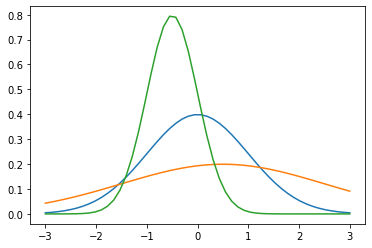

In [18]:
x = np.linspace(-3, 3, 50)
p = plt.plot(x, norm.pdf(x, loc=0, scale=1))
p = plt.plot(x, norm.pdf(x, loc=0.5, scale=2))
p = plt.plot(x, norm.pdf(x, loc=-0.5, scale=.5))
plt.show()

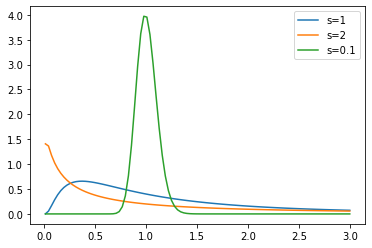

In [19]:
# 不同参数的对数正态分布：
from scipy.stats import lognorm

x = np.linspace(0.01, 3, 100)

plt.plot(x, lognorm.pdf(x, 1), label='s=1')
plt.plot(x, lognorm.pdf(x, 2), label='s=2')
plt.plot(x, lognorm.pdf(x, .1), label='s=0.1')

plt.legend()
plt.show()

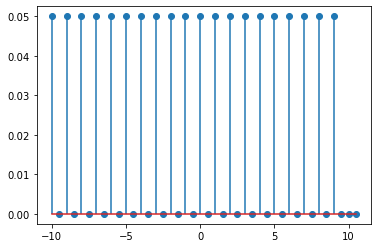

In [20]:
# 离散分布
from scipy.stats import randint

# 离散均匀分布的概率质量函数（PMF）：
high = 10
low = -10

x = np.arange(low, high + 1, 0.5)
p = plt.stem(x, randint(low, high).pmf(x))  # 杆状图
plt.show()

### 假设检验
相关的函数：

1. 正态分布
2. 独立双样本 t 检验，配对样本 t 检验，单样本 t 检验
3. 学生 t 分布

导入函数：

In [21]:
from scipy.stats import norm
from scipy.stats import ttest_ind

# 独立样本 t 检验
# 两组参数不同的正态分布：
n1 = norm(loc=0.3, scale=1.0)
n2 = norm(loc=0, scale=1.0)

# 从分布中产生两组随机样本：
n1_samples = n1.rvs(size=100)
n2_samples = n2.rvs(size=100)

# 将两组样本混合在一起：
samples = np.hstack((n1_samples, n2_samples))

# 最大似然参数估计：
loc, scale = norm.fit(samples)
n = norm(loc=loc, scale=scale)

# 比较：
x = np.linspace(-3, 3, 100)

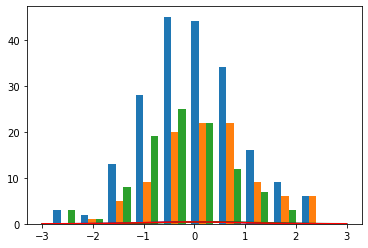

In [22]:
plt.hist([samples, n1_samples, n2_samples])
plt.plot(x, n.pdf(x), 'b-')
plt.plot(x, n1.pdf(x), 'g-')
plt.plot(x, n2.pdf(x), 'r-')
plt.show()

独立双样本 t 检验的目的在于判断两组样本之间是否有显著差异：

In [23]:
t_val, p = ttest_ind(n1_samples, n2_samples)

print('t = {}'.format(t_val))
print('p-value = {}'.format(p))
# t = 0.868384594123
# p-value = 0.386235148899

t = 4.238039942388443
p-value = 3.4551178415131466e-05


p 值小，说明这两个样本有显著性差异。

本节完。